## Importing and prepping data

In [1]:
import pandas as pd
import numpy as np
import diff_classifier.aws as aws
import diff_classifier.pca as pca
import os

In [2]:
features = []
remote_folder = 'Gel_studies' #Folder in AWS S3 containing files to be analyzed
bucket = 'dtoghani.data'
vids = 10
mws = ['5k_PEG', 'PS_COOH', '5k_PEG_NH2', 'PS_NH2']
nonnum = ['Particle Type', 'Video Number', 'Track_ID', 'Deff2',
          'Mean Mean_Intensity', 'Std Mean_Intensity',
          'X', 'Y', 'Mean X', 'Mean Y', 'Std X', 'Std Y']
calcs = [2]

counter = 0
for calc in calcs:
    for mw in mws:
        for num in range(1, vids+1):
            try:
                filename = 'features_{}_{}mM_XY{}.csv'.format(mw, calc, '%02d' % num)
                #os.remove(filename)
                #aws.download_s3('{}/{}'.format(remote_folder, filename), filename, bucket_name=bucket)
                fstats = pd.read_csv(filename, encoding = "ISO-8859-1", index_col='Unnamed: 0')
                fstats['Particle Type'] = pd.Series(fstats.shape[0]*[mw], index=fstats.index)
                fstats['Video Number'] = pd.Series(fstats.shape[0]*[num], index=fstats.index)
                #fstats['Calcium Concentration'] = pd.Series(fstats.shape[0]*[str(calcs)], index=fstats.index)
                #print(num)
                print(filename)
                counter = counter + 1
                if counter == 1:
                    fstats_tot = fstats
                else:
                    fstats_tot = fstats_tot.append(fstats, ignore_index=True)
            except:
                print('skip filename: {}'.format(filename))

features_5k_PEG_2mM_XY01.csv
features_5k_PEG_2mM_XY02.csv
features_5k_PEG_2mM_XY03.csv
features_5k_PEG_2mM_XY04.csv
features_5k_PEG_2mM_XY05.csv
features_5k_PEG_2mM_XY06.csv
features_5k_PEG_2mM_XY07.csv
features_5k_PEG_2mM_XY08.csv
features_5k_PEG_2mM_XY09.csv
features_5k_PEG_2mM_XY10.csv
features_PS_COOH_2mM_XY01.csv
features_PS_COOH_2mM_XY02.csv
features_PS_COOH_2mM_XY03.csv
features_PS_COOH_2mM_XY04.csv
features_PS_COOH_2mM_XY05.csv
features_PS_COOH_2mM_XY06.csv
features_PS_COOH_2mM_XY07.csv
features_PS_COOH_2mM_XY08.csv
skip filename: features_PS_COOH_2mM_XY09.csv
features_PS_COOH_2mM_XY10.csv
features_5k_PEG_NH2_2mM_XY01.csv
features_5k_PEG_NH2_2mM_XY02.csv
features_5k_PEG_NH2_2mM_XY03.csv
features_5k_PEG_NH2_2mM_XY04.csv
features_5k_PEG_NH2_2mM_XY05.csv
features_5k_PEG_NH2_2mM_XY06.csv
features_5k_PEG_NH2_2mM_XY07.csv
features_5k_PEG_NH2_2mM_XY08.csv
features_5k_PEG_NH2_2mM_XY09.csv
features_5k_PEG_NH2_2mM_XY10.csv
features_PS_NH2_2mM_XY01.csv
features_PS_NH2_2mM_XY02.csv
feature

In [ ]:
fstats_new.to_csv('features.csv')

In [ ]:
fstats_tot.shape

In [ ]:
#PCA analyses with too many datapoints fail. You get rows with lots of NAs. I'm going to try making a subset of the data first
#and then do a PCA analysis on that.

#include all in analysis
import random
subset = np.sort(np.array(random.sample(range(fstats_new.shape[0]), 500000)))
fstats_sub = fstats_new.loc[subset, :].reset_index(drop=True)

In [3]:
#with equal sample sizes for each particle type
import random
counter = 0
#mws = ['10k_PEG', '5k_PEG', '1k_PEG', 'PS_COOH']
for mw in mws:
    fstats_type = fstats_tot[fstats_tot['Particle Type']==mw].reset_index(drop=True)
    print(fstats_type.shape)
    subset = np.sort(np.array(random.sample(range(fstats_type.shape[0]), 11000)))
    if counter == 0:
        fstats_sub = fstats_type.loc[subset, :].reset_index(drop=True)
    else:
        fstats_sub = fstats_sub.append(fstats_type.loc[subset, :].reset_index(drop=True), ignore_index=True)
    counter = counter + 1

(496469, 69)
(704180, 69)
(381189, 69)
(11781, 69)


In [ ]:
for mw in mws:
    print(fstats_tot[fstats_tot['Particle Type'] == mw].shape)

In [4]:
#fstats = pd.read_csv(filename, encoding = "ISO-8859-1", index_col='Unnamed: 0')
fstats_totMW = fstats_sub[fstats_sub['Particle Type'].isin(mws)].reset_index(drop=True)
#nonnum = ['Particle Type', 'Video Number', 'Track_ID', 'Calcium Concentration', 'Deff2']
fstats_num = fstats_totMW.drop(nonnum, axis=1)
fstats_raw = fstats_num.values
#fstats

## PCA analysis

The pca.pca_analysis function provides a completely contained PCA analysis of the input trajectory features dataset. It includes options to impute NaN values (fill in with average values or drop them), and to scale features. Read the docstring for more information. 

In [6]:
ncomp = 10
pcadataset = pca.pca_analysis(fstats_totMW, dropcols=nonnum, n_components=ncomp)

Cumulative explained variance:
0 component: 0.4041906985952326
1 component: 0.5028560451991749
2 component: 0.5702374603488161
3 component: 0.6213070231915975
4 component: 0.6614619108151768
5 component: 0.6984029858440258
6 component: 0.7284437616287706
7 component: 0.7559631826973571
8 component: 0.7793301947866368
9 component: 0.8006562271167619


The pca.kmo function calculates the Kaiser-Meyer-Olkin statistic, a measure of sampling adequacy. Check the docstring for more information.

In [13]:
kmostat = pca.kmo(pcadataset.scaled)

0.934163684263


## Visualization

Users can then compare average principle component values between subgroups of the data. In this case, all particles were taken from the same sample, so there are no experimental subgroups. I chose to compare short trajectories to long trajectories, as I would expect differences between the two groups.

In [7]:
import numpy as np
#ncomp = 10
dicti = {}
#test = np.exp(np.nanmean(np.log(pcadataset.final[pcadataset.final['Particle Size']==200].as_matrix()), axis=0))[-6:]
#test1 = np.exp(np.nanmean(np.log(pcadataset.final[pcadataset.final['Particle Size']==500].as_matrix()), axis=0))[-6:]
dicti[0] = np.nanmean(pcadataset.final[pcadataset.final['Particle Type']=='5k_PEG'].values[:, -ncomp:], axis=0)
dicti[1] = np.nanmean(pcadataset.final[pcadataset.final['Particle Type']=='PS_COOH'].values[:, -ncomp:], axis=0)
dicti[2] = np.nanmean(pcadataset.final[pcadataset.final['Particle Type']=='5k_PEG_NH2'].values[:, -ncomp:], axis=0)
dicti[3] = np.nanmean(pcadataset.final[pcadataset.final['Particle Type']=='PS_NH2'].values[:, -ncomp:], axis=0)

In [ ]:
dicti[3]

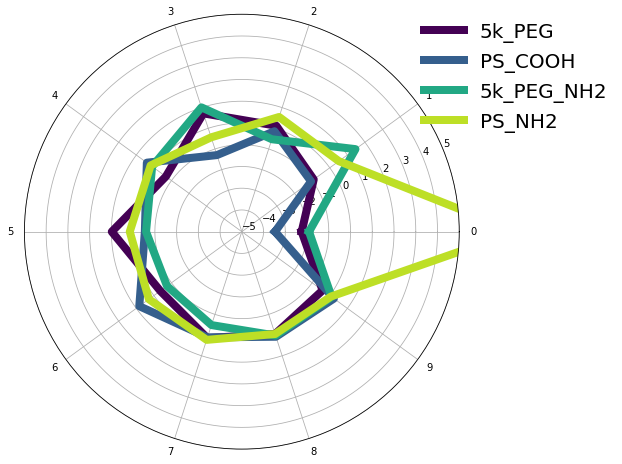

In [8]:
labels = mws
pca.plot_pca(dicti, savefig=True, labels=labels, rticks=np.linspace(-5, 5, 11))

The variable pcadataset.prcomps shows the user the major contributions to each of the new principle components. When observing the graph above, users can see that there are some differences between short trajectories and long trajectories in component 0 (asymmetry1 being the major contributor) and component 1 (elongation being the major contributor).

In [ ]:
pcadataset.prcomps

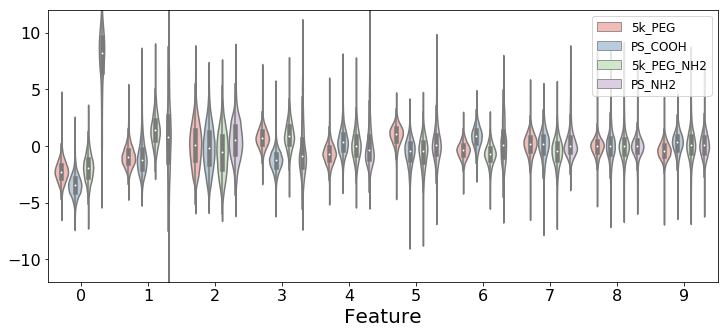

In [9]:
feats = pca.feature_violin(pcadataset.final, label='Particle Type', lvals=labels, fsubset=ncomp, yrange=[-12, 12])

In [ ]:
fstats1 = pca.feature_plot_2D(pcadataset.final, label='Particle Type', lvals=labels, randcount=400, yrange=[-6, 6],
                              xrange=[-4, 4])

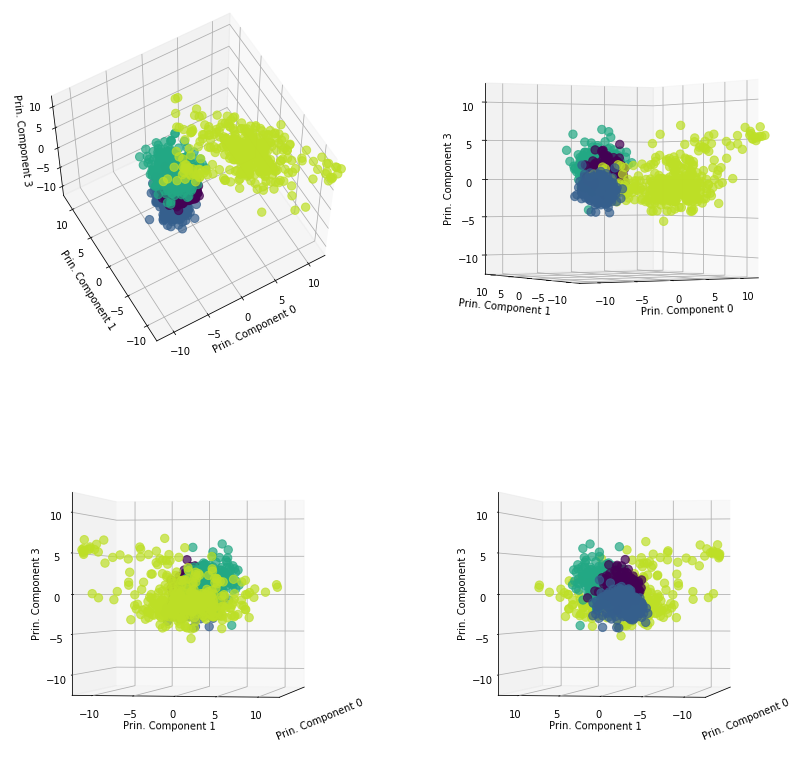

In [10]:
fstats1 = pca.feature_plot_3D(pcadataset.final, label='Particle Type', lvals=labels, randcount=400, ylim=[-12, 12],
                              xlim=[-12, 12], zlim=[-12, 12], features=[0, 1, 3])

In [11]:
#ncomp = 12
trainp = np.array([])
testp = np.array([])

for i in range(0, 20):
    KNNmod, X, y = pca.build_model(pcadataset.final, 'Particle Type', labels, equal_sampling=True,
                                       tsize=400, input_cols=ncomp, model='MLP', NNhidden_layer=(6, 2))
    trainp = np.append(trainp, pca.predict_model(KNNmod, X, y))
    
    X2 = pcadataset.final.values[:, -ncomp:]
    y2 = pcadataset.final['Particle Type'].values
    testp = np.append(testp, pca.predict_model(KNNmod, X2, y2))
    print('Run {}: {}'.format(i, testp[i]))

Run 0: 0.9212727272727272
Run 1: 0.9229090909090909
Run 2: 0.9182954545454546
Run 3: 0.9243181818181818
Run 4: 0.9229090909090909
Run 5: 0.9252954545454546
Run 6: 0.9264545454545454
Run 7: 0.9251136363636364
Run 8: 0.9263636363636364
Run 9: 0.9276818181818182
Run 10: 0.922
Run 11: 0.9216590909090909
Run 12: 0.9282954545454546
Run 13: 0.9283636363636364
Run 14: 0.9292727272727273
Run 15: 0.9273863636363636
Run 16: 0.9274772727272728
Run 17: 0.9248863636363637
Run 18: 0.9255454545454546
Run 19: 0.9271136363636364


In [12]:
print('{} +/ {}'.format(np.mean(trainp), np.std(trainp)))
print('{} +/ {}'.format(np.mean(testp), np.std(testp)))

0.9386875 +/ 0.005905836625745756
0.9251306818181819 +/ 0.0027944554293626175


In [ ]:
subset

In [ ]:
fstats_new

In [ ]:
bitesize['Particle Type']

In [16]:
pcadataset.components.to_csv('components.csv')

In [15]:
pcadataset.prcomps

,0,1,2,3,4,5,6,7,8,9
0,Mean straightness,Std trappedness,elongation,frames,Std asymmetry1,Mean kurtosis,frames,D_fit,kurtosis,Std kurtosis
1,Mean alpha,Std boundedness,asymmetry3,Quality,Std asymmetry2,Std kurtosis,Std Quality,alpha,Deff1,Mean kurtosis
2,Mean efficiency,Std elongation,AR,Mean Quality,Mean MSD_ratio,Std MSD_ratio,Mean Quality,Deff1,straightness,Std MSD_ratio
3,Std efficiency,Std fractal_dim,asymmetry2,Std Quality,straightness,Mean MSD_ratio,Mean frames,Std Quality,efficiency,Mean MSD_ratio
4,Std straightness,Std asymmetry2,asymmetry1,boundedness,efficiency,Mean SN_Ratio,boundedness,kurtosis,Std MSD_ratio,Std SN_Ratio
